In [618]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [619]:
SAMPLING_RATE = 50

In [620]:
THRESHOLD = 0.05

# Read data from csv

In [621]:
dataframe = pd.read_csv("data\WAVING 11-05-23 14-12-26.csv")

In [622]:
SAMLPE_LENGTH = round(dataframe['timestamp'].max() - dataframe['timestamp'].min(),4)

# Filtering

TODO: 
- Filter out very low values
- Cut start and end
- 

Cut start and end

In [623]:
cut_df = dataframe.copy()

cut_df = cut_df[(cut_df['timestamp'] >= (cut_df['timestamp'].min() + 0.5)) & (cut_df['timestamp'] <= (cut_df['timestamp'].max() - 0.5))]

Filter out sensor fluctuation

In [624]:
filtered_df = cut_df.copy()

filtered_df[['acc_x','acc_y','acc_z','gyr_x','gyr_y','gyr_z','grav_x','grav_y','grav_z']]  = filtered_df[['acc_x','acc_y','acc_z','gyr_x','gyr_y','gyr_z','grav_x','grav_y','grav_z']].clip(lower=THRESHOLD)

Apply noise filter

In [625]:
kernel = signal.gaussian(10,3)
kernel /= np.sum(kernel)

gaussian_df = filtered_df.copy()

gaussian_df[['acc_x','acc_y','acc_z','gyr_x','gyr_y','gyr_z','grav_x','grav_y','grav_z']]  = gaussian_df[['acc_x','acc_y','acc_z','gyr_x','gyr_y','gyr_z','grav_x','grav_y','grav_z']].transform(lambda x: np.convolve(x, kernel, 'same'),raw=True)

# FFT

In [626]:
spectrum_acc_x = np.abs(np.fft.fft(gaussian_df['acc_x']))
spectrum_acc_y = np.abs(np.fft.fft(gaussian_df['acc_y']))
spectrum_acc_z = np.abs(np.fft.fft(gaussian_df['acc_z']))
spectrum_gyr_x = np.abs(np.fft.fft(gaussian_df['gyr_x']))
spectrum_gyr_y = np.abs(np.fft.fft(gaussian_df['gyr_y']))
spectrum_gyr_z = np.abs(np.fft.fft(gaussian_df['gyr_z']))
spectrum_grav_x = np.abs(np.fft.fft(gaussian_df['grav_x']))
spectrum_grav_y = np.abs(np.fft.fft(gaussian_df['grav_y']))
spectrum_grav_z = np.abs(np.fft.fft(gaussian_df['grav_z']))

In [627]:
frequencies_acc_x = np.fft.fftfreq(len(gaussian_df['acc_x']), 1/SAMPLING_RATE)
frequencies_acc_y = np.fft.fftfreq(len(gaussian_df['acc_y']), 1/SAMPLING_RATE)
frequencies_acc_z = np.fft.fftfreq(len(gaussian_df['acc_z']), 1/SAMPLING_RATE)
frequencies_gyr_x = np.fft.fftfreq(len(gaussian_df['gyr_x']), 1/SAMPLING_RATE)
frequencies_gyr_y = np.fft.fftfreq(len(gaussian_df['gyr_y']), 1/SAMPLING_RATE)
frequencies_gyr_z = np.fft.fftfreq(len(gaussian_df['gyr_z']), 1/SAMPLING_RATE)
frequencies_grav_x = np.fft.fftfreq(len(gaussian_df['grav_x']), 1/SAMPLING_RATE)
frequencies_grav_y = np.fft.fftfreq(len(gaussian_df['grav_y']), 1/SAMPLING_RATE)
frequencies_grav_z = np.fft.fftfreq(len(gaussian_df['grav_z']), 1/SAMPLING_RATE)

In [628]:
mask_acc_x = frequencies_acc_x > 0
mask_acc_y = frequencies_acc_y > 0
mask_acc_z = frequencies_acc_z > 0

mask_gyr_x = frequencies_gyr_x > 0
mask_gyr_y = frequencies_gyr_y > 0
mask_gyr_z = frequencies_gyr_z > 0

mask_grav_x = frequencies_grav_x > 0
mask_grav_y = frequencies_grav_y > 0
mask_grav_z = frequencies_grav_z > 0

In [629]:
frequency_acc_x = np.argmax(spectrum_acc_x[mask_acc_x]*SAMPLING_RATE)/SAMLPE_LENGTH
frequency_acc_y = np.argmax(spectrum_acc_y[mask_acc_y]*SAMPLING_RATE)/SAMLPE_LENGTH
frequency_acc_z = np.argmax(spectrum_acc_z[mask_acc_z]*SAMPLING_RATE)/SAMLPE_LENGTH

frequency_gyr_y = np.argmax(spectrum_gyr_y[mask_gyr_y]*SAMPLING_RATE)/SAMLPE_LENGTH
frequency_gyr_x = np.argmax(spectrum_gyr_x[mask_gyr_x]*SAMPLING_RATE)/SAMLPE_LENGTH
frequency_gyr_z = np.argmax(spectrum_gyr_z[mask_gyr_z]*SAMPLING_RATE)/SAMLPE_LENGTH

frequency_grav_y = np.argmax(spectrum_grav_y[mask_grav_y]*SAMPLING_RATE)/SAMLPE_LENGTH
frequency_grav_x = np.argmax(spectrum_grav_x[mask_grav_x]*SAMPLING_RATE)/SAMLPE_LENGTH
frequency_grav_z = np.argmax(spectrum_grav_z[mask_grav_z]*SAMPLING_RATE)/SAMLPE_LENGTH

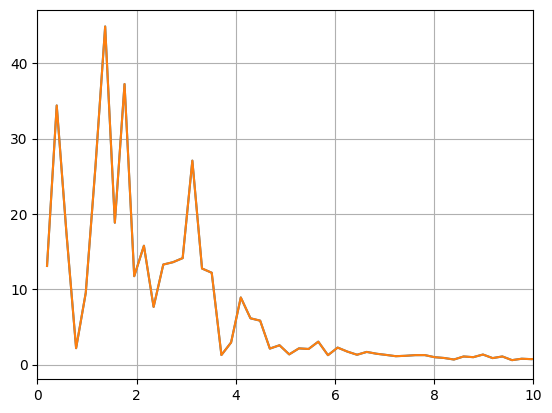

In [630]:
ax = plt.gca()
ax.set_xlim([0, 10])
ax.grid(True)
ax.plot(frequencies_acc_x[mask_acc_x], spectrum_acc_x[mask_acc_x])
ax.plot(frequencies_gyr_x[mask_gyr_y], spectrum_gyr_y[mask_gyr_y])
ax.plot(frequencies_grav_x[mask_grav_y], spectrum_gyr_y[mask_grav_y])

In [631]:
print(frequency_acc_x)
print(frequency_acc_y)
print(frequency_acc_z)

print(frequency_gyr_x)
print(frequency_gyr_y)
print(frequency_gyr_z)

print(frequency_grav_x)
print(frequency_grav_y)
print(frequency_grav_z)

0.30512922222561256
0.30512922222561256
0.9153876666768377
0.30512922222561256
0.9153876666768377
0.30512922222561256
0.30512922222561256
0.30512922222561256
0.30512922222561256


<bound method Axes.plot of <Axes: >>

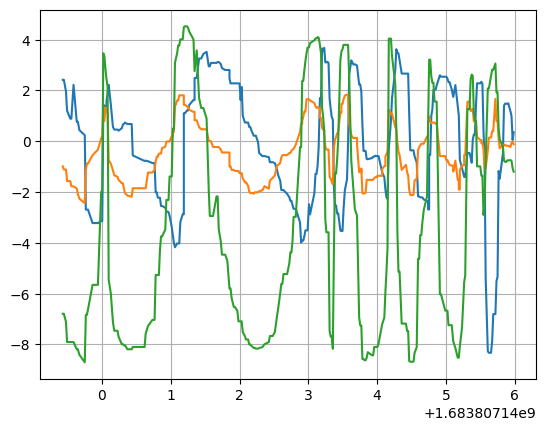

In [632]:
ax = plt.gca()
ax.grid(True)
ax.plot(dataframe['timestamp'], dataframe["gyr_x"])
ax.plot(dataframe['timestamp'], dataframe["acc_x"])
ax.plot(dataframe['timestamp'], dataframe["grav_x"])
ax.plot

In [633]:
#gaussian_df["grav_x"].plot()
plt.plot(gaussian_df['timestamp'], gaussian_df["gyr_x"])
plt.axes.
plt.show()

SyntaxError: invalid syntax (1337201371.py, line 3)

In [ ]:
np.argmax(np.abs(np.fft.fft(gaussian_df["gyr_x"])))

0

In [ ]:
np.fft.fft(np.abs(gaussian_df["gyr_x"]))

array([ 1.49154210e+03+0.00000000e+00j, -2.23876318e+02-1.90414330e+01j,
       -7.47767945e+01-1.19063438e+02j, -2.47139372e+01+1.38565455e+02j,
       -4.99442879e+01+4.17739066e+01j,  4.22219002e+01+8.37260484e+01j,
       -4.03701063e+01+9.92497405e+01j, -7.16383744e+01-5.23928078e+00j,
       -1.42452617e+02+4.90014490e+01j, -1.16613440e+01-9.87598555e+01j,
        1.42692932e+02-5.33895129e+01j,  8.46798329e+01-1.43584819e+02j,
       -5.41195956e+02+1.71076362e+01j,  7.43375388e+01+1.35489918e+02j,
        2.70540265e+00-1.37196794e+02j, -1.17714575e+01+9.48898964e+01j,
        2.01462732e+02+1.93453912e+01j, -3.28217400e+01+8.26048703e+01j,
       -1.48672561e+02-1.16636927e+02j, -7.34905052e+01-8.44101547e+00j,
        7.09351421e+01-8.16116998e+00j,  1.70747969e+01+1.10004290e+02j,
        3.31488769e+01-2.21557037e+02j, -2.61906572e+00+4.71612803e+01j,
        3.69526743e+01-7.95881829e+01j,  5.38841595e+01-7.94953160e+01j,
        8.23460327e+01-9.19605850e+00j,  4.20491729